In [1]:
import numpy as np
import pandas as pd
import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

['d:\\Repositories\\PhD\\notebooks\\automated_modeling', 'd:\\Anaconda\\envs\\ai-env-torch\\python310.zip', 'd:\\Anaconda\\envs\\ai-env-torch\\DLLs', 'd:\\Anaconda\\envs\\ai-env-torch\\lib', 'd:\\Anaconda\\envs\\ai-env-torch', '', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\envs\\ai-env-torch\\lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [2]:
import importlib

In [6]:
import agentic_processing

In [3]:
import agentic_modeling

In [35]:
importlib.reload(agentic_modeling)

<module 'agentic_modeling' from 'D:\\Repositories\\PhD\\src\\classes\\agentic_modeling.py'>

In [5]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [14]:
c3 = df['Channel 3']

In [31]:
pe2 = agentic_processing.PipelineExecutor.load(r"D:\Repositories\PhD\notebooks\automated_processing\best_preproc.joblib")
y_new = pe2.transform(c3)

In [16]:
import matplotlib.pyplot as plt

(array([1.20000e+01, 3.09000e+02, 7.11800e+03, 5.11440e+04, 1.34442e+05,
        1.38347e+05, 5.08900e+04, 7.41600e+03, 3.72000e+02, 1.20000e+01]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

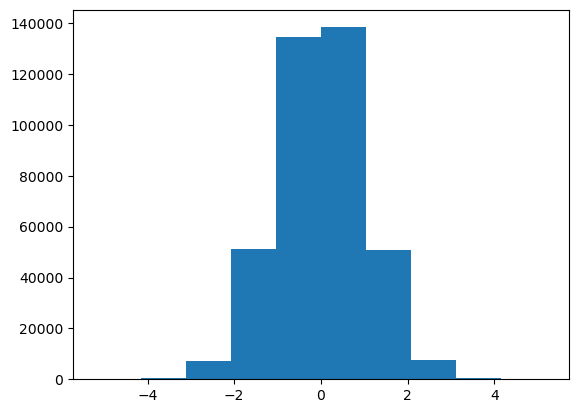

In [17]:
plt.hist(y_new)

In [32]:
y_new.shape

(390062,)

In [ ]:
y_new = y_new.reshape(-1, 1)

In [21]:
label = df['FAULT']

In [24]:
label = label.values

In [25]:
import optuna

In [38]:
sr = agentic_modeling.StudyRunner()

TypeError: StudyRunner.__init__() missing 2 required positional arguments: 'objective' and 'cv'

In [39]:
agentic_modeling.optuna_objective

<function agentic_modeling.optuna_objective(trial, X, y, weights=None, n_splits=5)>

In [ ]:
weights = {"accuracy": 0.1, "precision": 0.3, "recall": 0.3, "f1": 0.2, "roc_auc": 0.1}

study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=5))
study.optimize(lambda t: agentic_modeling.optuna_objective(t, y_new.reshape(-1, 1), label,
                  weights=weights, n_splits=5),
               n_trials=100)


print("Best score:", study.best_value)
print("Best config:", study.best_trial.params)
cfg = study.best_trial.user_attrs if "config" in study.best_trial.user_attrs else None

[I 2025-10-21 09:44:10,147] A new study created in memory with name: no-name-309fbfda-ec80-493e-9092-c85094c57d91
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128, 64) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\envs\ai-env-torch\lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64, 64, 32) which is of type tuple.
  warnings.warn(message)
D:\Repositories\PhD\src\classes\agentic_modeling.py:127: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return np.argmax(probs, axis=1)
D:\Repositories\PhD\src\classes\agentic_modeling.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is dep

[TorchANN] epoch 001 train_loss=0.6419 val_loss=0.6172
[TorchANN] epoch 005 train_loss=0.6068 val_loss=0.5985
[TorchANN] epoch 010 train_loss=0.6001 val_loss=0.5932
[TorchANN] epoch 015 train_loss=0.5969 val_loss=0.5908
[TorchANN] epoch 020 train_loss=0.5947 val_loss=0.5888
[TorchANN] epoch 025 train_loss=0.5933 val_loss=0.5876
[TorchANN] epoch 030 train_loss=0.5923 val_loss=0.5870
[TorchANN] epoch 035 train_loss=0.5920 val_loss=0.5862


D:\Repositories\PhD\src\classes\agentic_modeling.py:127: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return np.argmax(probs, axis=1)
D:\Repositories\PhD\src\classes\agentic_modeling.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  weight: float = 1.0
D:\Repositories\PhD\src\classes\agentic_modeling.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @dataclass


[TorchANN] epoch 001 train_loss=0.6429 val_loss=0.6167
[TorchANN] epoch 005 train_loss=0.6081 val_loss=0.5968
[TorchANN] epoch 010 train_loss=0.5997 val_loss=0.5917
[TorchANN] epoch 015 train_loss=0.5967 val_loss=0.5891
[TorchANN] epoch 020 train_loss=0.5948 val_loss=0.5885
[TorchANN] epoch 025 train_loss=0.5933 val_loss=0.5864
[TorchANN] epoch 030 train_loss=0.5921 val_loss=0.5853
[TorchANN] epoch 035 train_loss=0.5915 val_loss=0.5850


D:\Repositories\PhD\src\classes\agentic_modeling.py:127: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return np.argmax(probs, axis=1)
D:\Repositories\PhD\src\classes\agentic_modeling.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  weight: float = 1.0
D:\Repositories\PhD\src\classes\agentic_modeling.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @dataclass


[TorchANN] epoch 001 train_loss=0.6406 val_loss=0.6205
[TorchANN] epoch 005 train_loss=0.6084 val_loss=0.5998
[TorchANN] epoch 010 train_loss=0.6008 val_loss=0.5940
[TorchANN] epoch 015 train_loss=0.5971 val_loss=0.5916
[TorchANN] epoch 020 train_loss=0.5949 val_loss=0.5889
[TorchANN] epoch 025 train_loss=0.5930 val_loss=0.5874
[TorchANN] epoch 030 train_loss=0.5917 val_loss=0.5876
[TorchANN] epoch 035 train_loss=0.5912 val_loss=0.5866


D:\Repositories\PhD\src\classes\agentic_modeling.py:127: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return np.argmax(probs, axis=1)
D:\Repositories\PhD\src\classes\agentic_modeling.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  weight: float = 1.0
D:\Repositories\PhD\src\classes\agentic_modeling.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @dataclass


[TorchANN] epoch 001 train_loss=0.6430 val_loss=0.6182
[TorchANN] epoch 005 train_loss=0.6072 val_loss=0.5981
[TorchANN] epoch 010 train_loss=0.6008 val_loss=0.5938
[TorchANN] epoch 015 train_loss=0.5987 val_loss=0.5912
[TorchANN] epoch 020 train_loss=0.5972 val_loss=0.5896
[TorchANN] epoch 025 train_loss=0.5954 val_loss=0.5888
[TorchANN] epoch 030 train_loss=0.5946 val_loss=0.5881
[TorchANN] epoch 035 train_loss=0.5935 val_loss=0.5874


D:\Repositories\PhD\src\classes\agentic_modeling.py:127: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return np.argmax(probs, axis=1)
D:\Repositories\PhD\src\classes\agentic_modeling.py:140: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  weight: float = 1.0
D:\Repositories\PhD\src\classes\agentic_modeling.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @dataclass


[TorchANN] epoch 001 train_loss=0.6447 val_loss=0.6202
[TorchANN] epoch 005 train_loss=0.6095 val_loss=0.6003
[TorchANN] epoch 010 train_loss=0.6012 val_loss=0.5949
[TorchANN] epoch 015 train_loss=0.5983 val_loss=0.5922
[TorchANN] epoch 020 train_loss=0.5964 val_loss=0.5912
[TorchANN] epoch 025 train_loss=0.5953 val_loss=0.5894
[TorchANN] epoch 030 train_loss=0.5937 val_loss=0.5884
[TorchANN] epoch 035 train_loss=0.5926 val_loss=0.5875


[I 2025-10-21 09:58:08,507] Trial 0 finished with value: 0.7274639456226708 and parameters: {'model_type': 'torch', 'torch_hidden': (128, 64), 'torch_dropout': 0.3440334052743669, 'torch_lr': 0.0001059349356808285, 'torch_batch': 128, 'torch_epochs': 35}. Best is trial 0 with value: 0.7274639456226708.
